# Linear Regression
## it's about comparing houses prices to house space by linear regression
- Name: Yousef alramli
- Date : 16/11/2021


In [151]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [152]:
data = pd.read_csv('kc_house_data.csv')


## Show the first five rows of the data set.


In [153]:
first_five = data.head(5)
first_five


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [154]:
x = data["sqft_lot"].values
y = data["price"].values
date = data["date"].values


In [155]:
x_train ,x_test ,y_train ,y_test , date_train ,date_test = train_test_split(x,y,date,test_size=0.05,random_state=13)


## Fit your training split to the regression model.


In [156]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1), y_train,)


LinearRegression()

## Show your regression model’s score.


In [157]:
model.score(x_test.reshape(-1,1),y_test)


0.008927040070309755

## Draw three conclusions from your regression model.

Text(0.5, 1.0, 'linear data depending on date')

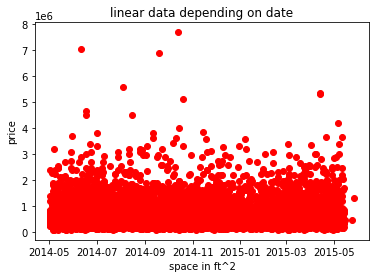

In [169]:
date = [pd.to_datetime(d) for d in date]
plt.scatter(date,y,color='red')
plt.xlabel('date')
plt.ylabel('price')
plt.title('prices depending on dates')

Text(0.5, 1.0, 'linear data')

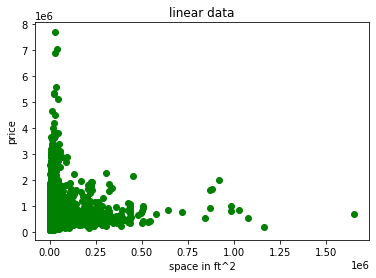

In [ ]:
plt.scatter(x_train,y_train,color='green')
plt.xlabel('space in ft^2')
plt.ylabel('price')
plt.title('linear data')

Text(0.5, 1.0, 'linear data')

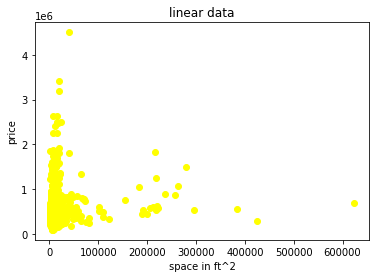

In [ ]:
plt.scatter(x_test,y_test,color='yellow')
plt.xlabel('space in ft^2')
plt.ylabel('price')
plt.title('linear data')